<a href="https://colab.research.google.com/github/liisareet/working-files/blob/main/FIX%20cross-promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

file_path = '/content/FIX_cp_final.csv'

df = pd.read_csv(file_path)

df.head()

,Cust Host Id,mob_contract_start_dt,product_contract_start_dt,days_difference
0,1000005251,10.06.2024,NaN,NaN
1,1266640,19.02.2024,NaN,NaN
2,9833068,10.08.2024,01.10.2024,52.0
3,9833068,10.08.2024,01.10.2024,52.0
4,1000196879,05.07.2024,NaN,NaN


In [4]:
total_mobility_customers = df['mob_contract_start_dt'].notnull().sum()

product_customers = df['product_contract_start_dt'].notnull().sum()

conversion_percentage = (product_customers / total_mobility_customers) * 100

print(f"Total Mobility Customers: {total_mobility_customers}")
print(f"Total Product Customers: {product_customers}")
print(f"Conversion Percentage: {conversion_percentage:.2f}%")

Total Mobility Customers: 73528
Total Product Customers: 36150
Conversion Percentage: 49.16%


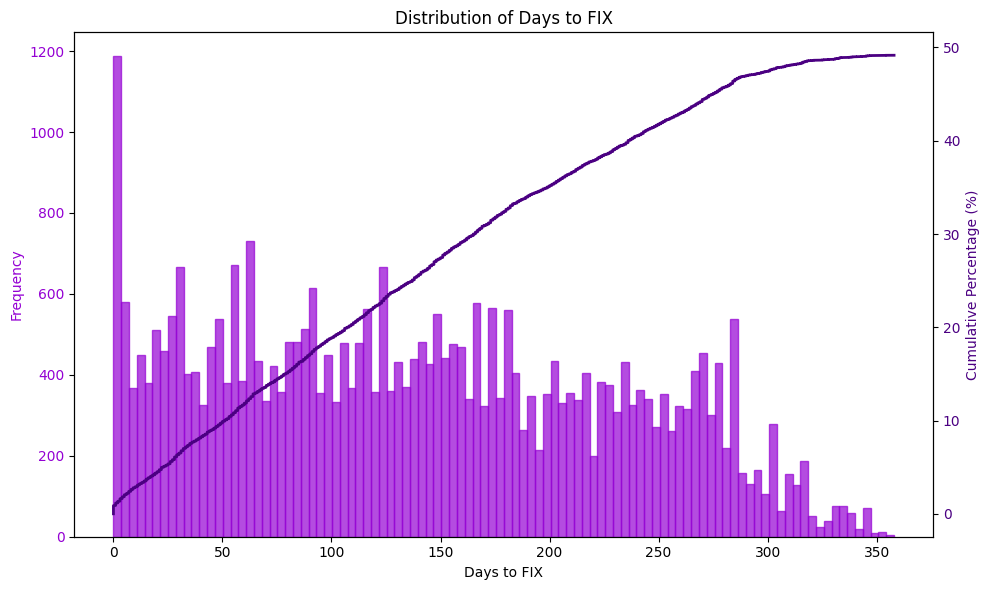

In [5]:
import matplotlib.pyplot as plt
import numpy as np

total_customers = len(df)

df_converted = df[df['days_difference'].notnull()]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(
    df_converted['days_difference'],
    bins=100,
    edgecolor='darkviolet',
    alpha=0.7,
    color='darkviolet'
)

ax1.set_title('Distribution of Days to FIX')
ax1.set_xlabel('Days to FIX')
ax1.set_ylabel('Frequency', color='darkviolet')
ax1.tick_params(axis='y', labelcolor='darkviolet')

ax2 = ax1.twinx()

sorted_days_converted = np.sort(df_converted['days_difference'])
cumulative_percentage_all = (
    np.arange(1, len(sorted_days_converted) + 1) / total_customers * 100
)

ax2.plot(
    sorted_days_converted,
    cumulative_percentage_all,
    color='indigo',
    linewidth=2,
    label='Cumulative Percentage (All Customers)'
)

ax2.set_ylabel('Cumulative Percentage (%)', color='indigo')
ax2.tick_params(axis='y', labelcolor='indigo')

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

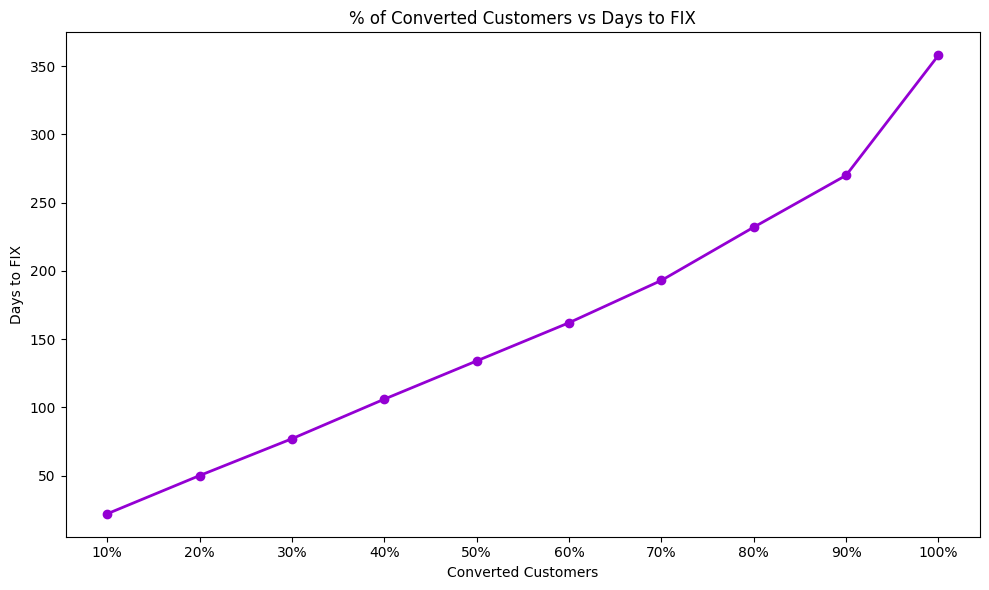

In [7]:
percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
percentile_values = df[df['days_difference'].notnull()]['days_difference'].quantile(percentiles)


plt.figure(figsize=(10, 6))
plt.plot(percentiles, percentile_values, marker='o', color='darkviolet', linestyle='-', linewidth=2)

plt.title('% of Converted Customers vs Days to FIX')
plt.xlabel('Converted Customers')
plt.ylabel('Days to FIX')
plt.xticks(percentiles, labels=[f"{int(p*100)}%" for p in percentiles])
plt.grid(False)

plt.tight_layout()
plt.show()

In [8]:
converted_df = df.dropna(subset=['product_contract_start_dt'])

converted_df_sorted = converted_df.sort_values(by='days_difference')

percentiles = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0]
percentile_values = converted_df_sorted['days_difference'].quantile(percentiles)

percentile_diff = percentile_values.diff().fillna(0)

percentile_table = pd.DataFrame({
    'Percentile': [f"{int(p*100)}%" for p in percentiles],
    'Days Difference': percentile_values.values,
    'Difference from Previous Percentile': percentile_diff.values
})

percentile_table

,Percentile,Days Difference,Difference from Previous Percentile
0,5%,8.00,0.00
1,10%,22.00,14.00
2,15%,35.00,13.00
3,20%,50.00,15.00
4,25%,62.00,12.00
5,30%,77.00,15.00
6,35%,91.00,14.00
7,40%,106.00,15.00
8,45%,119.05,13.05
9,50%,134.00,14.95


In [9]:
converted_df = df.dropna(subset=['product_contract_start_dt'])

converted_df_sorted = converted_df.sort_values(by='days_difference')

percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60,0.70, 0.80, 0.90, 1.0]
percentile_values = converted_df_sorted['days_difference'].quantile(percentiles)

percentile_diff = percentile_values.diff().fillna(0)

percentile_table_10 = pd.DataFrame({
    'Percentile': [f"{int(p*100)}%" for p in percentiles],
    'Days Difference': percentile_values.values,
    'Difference from Previous Percentile': percentile_diff.values
})

percentile_table_10

,Percentile,Days Difference,Difference from Previous Percentile
0,10%,22.0,0.0
1,20%,50.0,28.0
2,30%,77.0,27.0
3,40%,106.0,29.0
4,50%,134.0,28.0
5,60%,162.0,28.0
6,70%,193.0,31.0
7,80%,232.0,39.0
8,90%,270.0,38.0
9,100%,358.0,88.0
